## Chapter 29: Calculating $\pi$

In [1]:
using Plots

In [2]:
function calcPi(n::Integer)
  n>0 || throw(ArgumentError("The input n must be positive."))
  local sum = 1.0
  for k=1:n
    sum += (-1)^k/(2k+1)
  end
  4*sum
end

calcPi (generic function with 1 method)

In [3]:
calcPi(100)

3.1514934010709914

In [4]:
absErr(x::Real)=abs(x-pi)

absErr (generic function with 1 method)

In [7]:
@time errors = map(n->absErr(calcPi(10^n)),1:7)

  0.532693 seconds (62.72 k allocations: 3.333 MiB)


7-element Array{Float64,1}:
 0.09072315581580082
 0.009900747481198291
 0.0009990007497511222
 9.99900007414567e-5
 9.999899927226608e-6
 9.999989813991306e-7
 9.999998829002266e-8

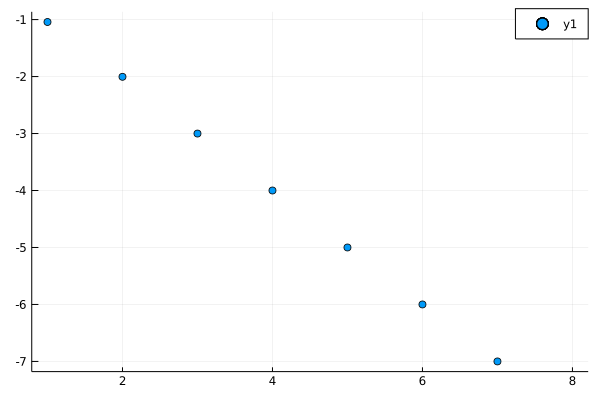

In [8]:
scatter(1:8,log10.(errors))

In [9]:
function atan_series(x::Real,n::Integer)
  n>0 || throw(ArgumentError("The input n must be positive."))
  local sum = x
  for k=1:n
    sum += (-1)^k*x^(2k+1)/(2k+1)
  end
  sum
end

atan_series (generic function with 1 method)

In [10]:
4*(atan_series(1/2,10^3)+atan_series(1/3,10^3))

3.1415926535897922

In [11]:
absErr(ans)

8.881784197001252e-16

In [12]:
atan_series(1/2,10^5)

0.46364760900080587

In [13]:
atan(1/2)

0.4636476090008061

In [14]:
errors2 = map(n->absErr(4*(atan_series(1/2,10^n)+atan_series(1/3,10^n))),2:8)

7-element Array{Float64,1}:
 8.881784197001252e-16
 8.881784197001252e-16
 8.881784197001252e-16
 8.881784197001252e-16
 8.881784197001252e-16
 8.881784197001252e-16
 8.881784197001252e-16

In [15]:
4*(atan_series(1/big(2),10)+atan_series(1/big(3),10))

3.141592670450685928962198876522890269927581216144673396936248687068054043860959

In [16]:
absErr(4*(atan_series(1/2,10)+atan_series(1/3,10)))

1.6860892237957614e-8

In [17]:
errors2=map(n->absErr(4*(atan_series(1/big(2),10n)+atan_series(1/big(3),10n))),1:5)

5-element Array{BigFloat,1}:
 1.686089269049955549324338738573041181676956757596130409476023763757476121934317e-08
 8.536932216599333104076888722842818062954460479040445168953455346681077569196179e-15
 5.541360098004753291440085860743946761847969162268014510791810751138256936210001e-21
 4.005347048909364704518520476811412326265959273017889120734252574465535050431139e-27
 3.075296346725383632749782433311833539450331895967037047902902585859740513243069e-33

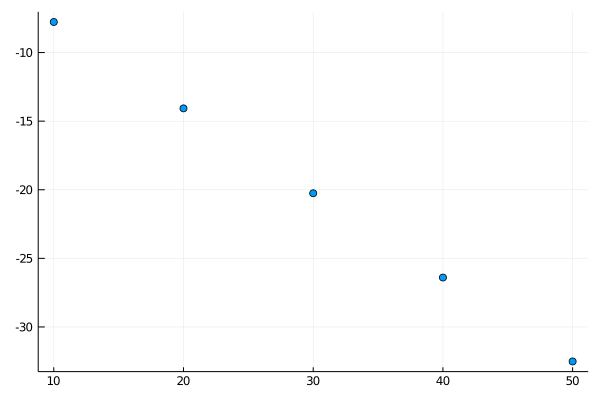

In [18]:
scatter(10:10:50,log10.(errors2), legend=false)

In [19]:
setprecision(4096) do
  pi1000=4*(atan_series(1/big(2),1425)+atan_series(1/big(3),1425))
end

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313767607390798827127806904817462172484821015565468031096567051962443312701210797236631454051559780700871857271755649993685742760248184170283

In [20]:
@time setprecision(4096) do
  pi1000=4*(atan_series(1/big(2),1700)+atan_series(1/big(3),1700))
  absErr(pi1000)
end

  0.055868 seconds (50.71 k allocations: 10.518 MiB, 14.52% gc time)


3.70052900103609275208500463910499516240116166325534990829122163691046380099145056606802409297322361179767985668570356560944723329772482749386162019537267400794102994765316378355751599779818160691072648652487229105370448493251679978033309998674001279633295413593449236934817299820297628323111373778188399593960031796135315299679495160313960325561409458257828687627398583473330887763666691460331252975913009808590576598523837473021169953584019990697715463328848363236140233627061592369138175354494856639095546643279313580994205529744142878916000530711440535884035668070811248852008354285267950389387375452491723923144821649167303711034769451637787450938396446308821140774870979478784211582582033341653022063101235561885758579530228581746659790270086936575328508151351989966011388698404381125971453708764346432834392644764185840907224192716583943322864411122825251009063474904650447486940543998968382799139603356565910745536692773317360938918398261068775088812884971637991869943864549615251204893706512

In [21]:
numDigits(pi_approx::Real) = floor(BigInt,-log10(absErr(pi_approx)))

numDigits (generic function with 1 method)

In [22]:
@time setprecision(4096) do
  pi1000=4*(atan_series(1/big(2),1700)+atan_series(1/big(3),1700))
  numDigits(pi1000)
end

  0.049675 seconds (60.85 k allocations: 11.068 MiB)


1027

In [23]:
setprecision(4096) do
  numDigits(4*(atan_series(1/big(2),100)+atan_series(1/big(3),100)))
  end

62

In [24]:
@time setprecision(2^22) do
  numDigits(4*(atan_series(1/big(2),100)+atan_series(1/big(3),100)))
  end

 20.529757 seconds (277.66 k allocations: 10.773 GiB, 0.90% gc time)


62

In [25]:
@time setprecision(2^22) do
  numDigits(4*(atan_series(1/big(2),200)+atan_series(1/big(3),200)))
end

 33.040052 seconds (310.72 k allocations: 17.863 GiB, 0.89% gc time)


123

In [26]:
function atan_series2(x::Real,n::Integer)
  n>0 || throw(ArgumentError("The input n must be positive."))
  local xsq=x^2
  local sum = 1
  local ak=1
  for k=2:n
    ak *= -xsq
    sum += ak/(2k-1)
  end
  x*sum
end

atan_series2 (generic function with 1 method)

In [27]:
atan_series2(1,5)

0.8349206349206351

In [28]:
numDigits(4*(4*atan_series2(1/big(5),20)+atan_series2(1/big(-239),20)))

29

In [29]:
using BenchmarkTools

In [30]:
@btime setprecision(2^18) do
  numDigits(4*(4*atan_series(1/big(5),20)+atan_series(1/big(-239),20)))
end

  232.631 ms (9417 allocations: 110.48 MiB)


30

In [31]:
@btime setprecision(2^18) do
  numDigits(4*(4*atan_series2(1/big(5),20)+atan_series2(1/big(-239),20)))
end

  136.937 ms (5965 allocations: 67.16 MiB)


29

In [32]:
setprecision(2^22) do
  length(string(1/big(3)))
end

1262615

In [33]:
50/123*1_000_000/60/60/24

4.704908160192713

In [34]:
@time setprecision(2^22) do
  numDigits(4*(4*atan_series(1/big(5),20)+atan_series(1/big(-239),20)))
  end

  7.277047 seconds (138.65 k allocations: 3.689 GiB, 0.88% gc time)


30

In [35]:
function machin(coeffs::Vector{Int},xvals::Vector{Int},n::Int)
  length(coeffs) == length(xvals) || throw(ArgumentError("The lengths of the vectors must match"))
  local sum=big(0)
  for i=1:length(coeffs)
    sum += coeffs[i]*atan_series2(1/big(xvals[i]),n)
  end
  4*sum
end

machin (generic function with 1 method)

In [36]:
@time setprecision(2^22) do
  numDigits(machin([4,-1],[5,239],20))
end

  4.872492 seconds (212.96 k allocations: 2.650 GiB, 1.06% gc time)


29

In [37]:
@time setprecision(2^22) do
  numDigits(machin([4,-1],[5,239],40))
end

  5.472309 seconds (160.78 k allocations: 3.094 GiB, 0.95% gc time)


57

In [38]:
1_000_000*11/58/60/60/24

2.195083014048531

In [39]:
@time setprecision(2^22) do
  numDigits(machin([44,7,-12,24],[57,239,682,12943],40))
end

  6.902990 seconds (173.76 k allocations: 4.025 GiB, 0.99% gc time)


141

In [40]:
@time setprecision(2^22) do
  numDigits(machin([44,7,-12,24],[57,239,682,12943],80))
end

  9.621368 seconds (180.74 k allocations: 5.812 GiB, 0.99% gc time)


282

In [41]:
1_000_000*10/282/60/60

9.850275807722616

## Ramanujan Formula

In [42]:
function chudnovsky(n::Integer)
  local sum1 = big(1.0)
  local sum2 = big(0.0)
  local top = big(1)
  local bottom = big(1)
  local C = big(640320)^3
  for k=1:n
    top *= -24*(6*k-5)*(2*k-1)*(6*k-1)
    bottom *= C*k^3 
    sum1 += top/bottom
    sum2 += k * top/bottom
  end
  426880*sqrt(big(10005))/(13591409*sum1 + 545140134*sum2)
end

chudnovsky (generic function with 1 method)

In [43]:
@time setprecision(2^14) do
  numDigits(chudnovsky(100))
end

  0.033388 seconds (97.82 k allocations: 8.569 MiB)


1432

In [44]:
function chud(n::Integer)
  sum = big(0)
  for k=0:n
    term1 =  (-1)^k*factorial(big(6k))/factorial(big(3k))/ factorial(big(k))^3/ (big(640320)^3)^(k+0.5)
    sum += 545140134*k*term1 + 13591409*term1
  end
  1/(12sum)
end

chud (generic function with 1 method)

In [45]:
@time setprecision(2^18) do
  numDigits(chud(5))
end

  0.992992 seconds (164.94 k allocations: 374.969 MiB, 1.63% gc time)


84

In [46]:
@time setprecision(2^22) do 
  numDigits(chud(40))
end

212.123560 seconds (3.89 M allocations: 100.176 GiB, 0.95% gc time)


581

In [ ]:
@time setprecision(2^22) do 
  numDigits(chud(20))
end

In [90]:
1_000_000/2850*20/60/60

1.949317738791423

In [50]:
using Distributed

In [ ]:
addprocs()  ## add all available cores

In [64]:
@everywhere function paraChud(n1::Integer,n2::Integer,prec::Integer)
  setprecision(prec)
  local C = big(640320)^3
  local bottom = big(1)
  local top = big(1)
  for k=1:n1
    bottom *= k^3*C
    top *= -8*(6k-1)*(6k-3)*(6k-5)
  end
  local sum1 = n1*top/bottom
  local sum2 = top/bottom 
  for k=n1+1:n2
    bottom *= k^3*C
    top *= -8*(6k-1)*(6k-3)*(6k-5)
    sum1 += k*top/bottom 
    sum2 += top/bottom
  end
  545140134*sum1 + 13591409*sum2
end

In [52]:
@time setprecision(2^10) do 
  numDigits(sqrt(big(640320)^3)/(12*(paraChud(0,9))))
end

MethodError: MethodError: no method matching paraChud(::Int64, ::Int64)
Closest candidates are:
  paraChud(::Integer, ::Integer, !Matched::Integer) at In[51]:1

In [53]:
@time let
  prec = 2^14
  p1 = paraChud(0,9,prec)
  p2 = paraChud(10,19,prec)
  p3 = paraChud(20,29,prec)
  p4 = paraChud(30,39,prec)
  numDigits(sqrt(big(640320)^3)/(12*(p1+p2+p3+p4)))
end

  0.004473 seconds (2.33 k allocations: 1.431 MiB)


567

In [54]:
setprecision(2^22) do
  length(string(1/big(3)))
end

1262615

In [55]:
using Distributed

12-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13

In [57]:
numDigits(pi_approx::Real) = floor(Int,-log10(absErr(pi_approx)))

numDigits (generic function with 1 method)

In [65]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(50*(i-1),50i-1,2^22),1:10)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 11.870842 seconds (600.94 k allocations: 2.239 GiB, 0.45% gc time)


7091

In [69]:
@time setprecision(2^22) do
  numDigits(chudnovsky(500))
end

 31.084097 seconds (447.51 k allocations: 18.114 GiB, 0.95% gc time)


7105

In [67]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(100*(i-1),100i-1,2^22),1:10)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

 19.191056 seconds (390.46 k allocations: 2.227 GiB, 0.23% gc time)


14182

In [68]:
1_000_000/14182*18.4/60

21.623654397593196

In [76]:
@time setprecision(2^22) do
  local p = pmap(i->paraChud(6000*(i-1),6000i-1,2^22),1:12)
  local s = sum(p)
  numDigits(sqrt(big(640320)^3)/(12s))
end

1084.717342 seconds (422.94 k allocations: 2.234 GiB, 0.02% gc time)


1021079

In [79]:
1081/60

18.016666666666666

In [92]:
setprecision(4096) do 
  length(string(1/big(3)))
end

1237